<a href="https://colab.research.google.com/github/micky-bank/img_process/blob/master/Open_Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
from PIL import Image as InImg
import cv2 as cv
import numpy as np
from constants import PAD_VALUE
# import platform
# print (platform.python_version())

# Common Functions

To Open Image

In [ ]:
def open_img (Img_Path = "Image_In.jpg") :
  inp = cv.imread (Img_Path)
  inp_gray = cv.cvtColor(inp, cv.COLOR_BGR2GRAY)
  print ("{} was opened." .format (Img_Path))
  return (inp_gray)


To Get Image Dimensions

In [ ]:
def get_img_dim (img_in) :
  img_h_w = img_in.shape
  print ("Image Height is : {} and Width is : {}" .format (img_h_w [0], img_h_w [1]))
  print (img_h_w)
  return (img_h_w)

In [ ]:
def write_img2file (img_in, img_h, img_w, wr_file_path = "Input_Img.csv") :
  inp_file = open (wr_file_path, "w")
  for m in range (img_h) :
    for n in range (img_w) :
      wr_img_str = [(str (img_in [m, n])), "\n"]
      # inp_file.write ((str (inp_gray [m][n])) "\n")
      inp_file.writelines (wr_img_str)
  inp_file.close()

In [ ]:
MAC Function

In [ ]:
def mac_RxR (kernel, img) :
  acc = 0
  k_h = kernel.shape [0]
  k_w = kernel.shape [1]
  for r in range (k_h) :
    for s in range (k_w) :
      acc = acc + (kernel [r, s] * img [r, s])

  return (acc)

Padding Function

In [ ]:
def pad (img, img_h, img_w) :
  padding_left   = np.zeros ((img_h, PAD_VALUE))
  padding_right  = np.zeros ((img_h, PAD_VALUE))

  for m in range (img_h) :
    for n in range (PAD_VALUE) :
      padding_left [m, n] = img [m, n]
      padding_right [m, n] = img [m, -n]

  # print (padding_left.shape)
  # print (padding_right.shape)
  # print (img.shape)
  img = np.insert (img, [0], padding_left, axis = 1)
  img = np.insert (padding_right, [0], img, axis = 1)


  padding_top    = np.zeros ((PAD_VALUE, img_w + 2*PAD_VALUE)) 
  padding_bottom = np.zeros ((PAD_VALUE, img_w + 2*PAD_VALUE))

  for m in range (PAD_VALUE) :
    for n in range (img_w+2*PAD_VALUE) :
      padding_top [m, n] = img [m, n]
      padding_bottom [m, n] = img [-m, n]

  # print (padding_top.shape)
  # print (padding_bottom.shape)

  img = np.insert (img, [0], padding_top , axis=0)
  img = np.insert (padding_bottom, [0], img , axis=0)

  print ('Image was resized after padding to: {}' .format(img.shape))

  return (img)

Read Mask/Filter Function

In [ ]:
def read_mask (mask_file_path) :
  rd_data = []
  kernel  = ''
  fp_mask = open (mask_file_path, "r")

  #--------------------------------------------------------------------
  # Read mask and other parameters from a formatted file.
  while True :
    rd_mask = fp_mask.readline ()
  
    if not rd_mask :
      break
  
    rd_mask = rd_mask.split ()
    # if ':' in rd_mask : rd_mask.remove (':')
  
    if 'Kernel_Size' in rd_mask :
      kernel = int (rd_mask [-1])
      print ('{} Filter Kernel Size is {}'.format (mask_file_path,kernel*kernel))
    else :
      rd_data.append (rd_mask)
  #--------------------------------------------------------------------
  
  wts = np.zeros ((kernel*kernel))
  # Extract meta-data from the read lists.
  for j in rd_data :
    # print (j)
    for i in range (kernel*kernel) :
      if 'W{}'.format(i) in j :
        wts [i] = (j [-1])
        #print (wts [i])
  
    if 'Scale_Factor' in j :
      scale_factor = int (j [-1])
      print ('Scale Factor is: {}'.format (scale_factor)) 
      #print (rd_data [i+1])
    
  
  # print ((wts))
  # print (type (wts))
  wts_arr = np.zeros ((kernel, kernel), dtype=int)
  
  print (kernel)
  for r in range (0, kernel) :
    for s in range (0, kernel) :
      wts_arr [r][s] = wts [r*kernel + s]
  
  print (wts_arr)
  return_list = (kernel, wts_arr, scale_factor)
  return (return_list)


Open Image and Get Dimensions

In [251]:
img_data = open_img ("Image_In.jpg")
print (img_data)
img_dim  = get_img_dim (img_data)
img_h    = img_dim [0]
img_w    = img_dim [1]

Image_In.jpg was opened.
[[14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 [14 14 14 ... 14 14 14]
 ...
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]
 [10 10 10 ... 10 10 10]]
Image Height is : 818 and Width is : 719
(818, 719)


Writing Input Image Data to csv file

In [252]:
write_img2file (img_data, img_h, img_w, "Input_Img.csv")

Filter Meta-Data Extraction

In [253]:
pad_img = pad (img_data, img_h, img_w)
pad_img_h = img_h + 2*PAD_VALUE
pad_img_w = img_w + 2*PAD_VALUE

Image was resized after padding to: (820, 721)


In [254]:
gradient_filter = read_mask ("Gradient.csv")
# print (gradient_filter)

unsharp_filter  = read_mask ("Sharpen.csv")

Gradient.csv Filter Kernel Size is 9
Scale Factor is: 1
3
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Sharpen.csv Filter Kernel Size is 9
Scale Factor is: 9
3
[[1 1 1]
 [1 1 1]
 [1 1 1]]


<class 'numpy.float64'>


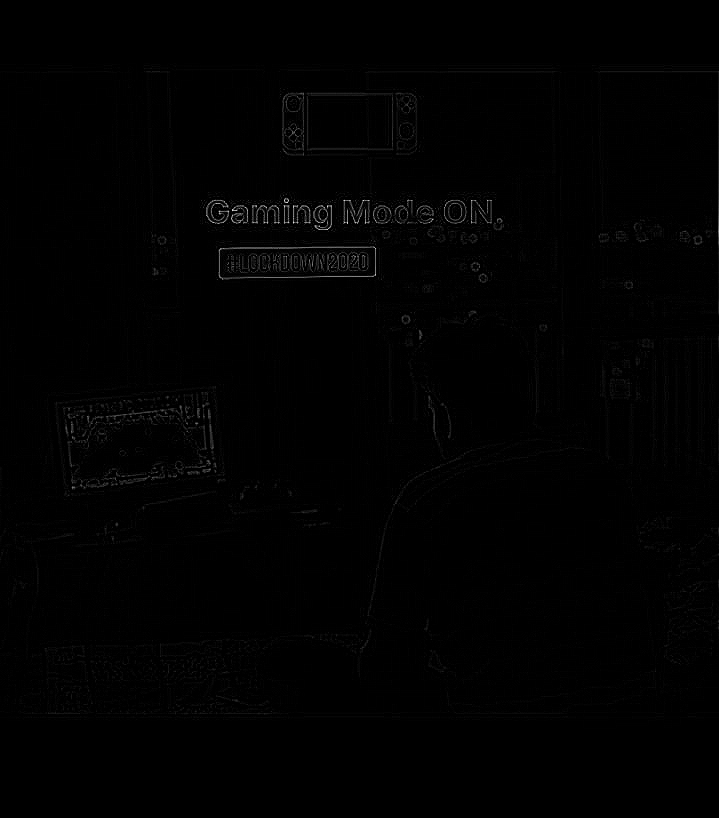

In [255]:
edge_kernel = gradient_filter [0]
edge_img = np.zeros ((img_h, img_w))
edge_mask = np.asarray (gradient_filter [1])
# print (pad_img.shape)
# print (type (edge_mask))
for m in range (img_h) :
  for n in range (img_w) :
    edge_img [m, n] = mac_RxR (edge_mask, pad_img [m:edge_kernel+m, n:edge_kernel+n])

    edge_img [m, n] = edge_img [m, n] / gradient_filter [2]
    if edge_img [m, n] < 0 :
      edge_img [m, n] = 0
    
    # print (type (gradient_filter [0]))
    #in_img = pad_img [int (m) : int (edge_kernel) + int (m), int (n) : int (edge_kernel) + int (n)]
    
print (type (edge_img [0,0]))
new_img = edge_img.astype (np.uint8)
from google.colab.patches import cv2_imshow
cv2_imshow (new_img)